In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing
pd.set_option('display.max_columns', 500)


import os


In [2]:
import datetime as dt # dates module
from datetime import date
import calendar
import time          #to get the system time

import plotly.express as px #helps in plotting
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.dates as mdates

In [3]:
print(os.listdir('../input/nyc-taxi-trip-duration/'))

['test.zip', 'sample_submission.zip', 'train.zip']


From the above code cell we can observe that all the csv files that we might need are zipped.

So the first thing we need to do is to unzip the files

In [4]:
!unzip ../input/nyc-taxi-trip-duration/train.zip
!unzip ../input/nyc-taxi-trip-duration/test.zip

Archive:  ../input/nyc-taxi-trip-duration/train.zip
  inflating: train.csv               
Archive:  ../input/nyc-taxi-trip-duration/test.zip
  inflating: test.csv                


In [5]:
!ls

__notebook_source__.ipynb  test.csv  train.csv


#### Obtaining the train data from the csv file

In [6]:
s = time.time()
train_fr_1 = pd.read_csv('../input/new-york-city-taxi-with-osrm/fastest_routes_train_part_1.csv')
train_fr_2 = pd.read_csv('../input/new-york-city-taxi-with-osrm/fastest_routes_train_part_2.csv')
train_fr = pd.concat([train_fr_1, train_fr_2])
train_fr_new = train_fr[['id', 'total_distance']]
train_df = pd.read_csv('../input/new-york-city-taxi-with-osrm/train.csv')
train = pd.merge(train_df, train_fr_new, on = 'id', how = 'left')
end = time.time()
print("Time taken by above cell is {}.".format((end-s)))

Time taken by above cell is 25.63035249710083.


In [7]:
del(train_fr_1)
del(train_fr_2)
del(train_fr_new)

In [8]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,total_distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2009.1
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2513.2
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11060.8
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1779.4
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1614.9


In [9]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,total_distance
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458643e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02,4.626383e+03
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03,5.303878e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02,1.666100e+03
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02,2.755100e+03
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03,5.113800e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06,9.420420e+04


In [10]:
print("The number of rows in the dataset is : ",train.shape[0])
print("The number of columns in the dataset is : ",train.shape[1])

The number of rows in the dataset is :  1458644
The number of columns in the dataset is :  12


In [11]:
display(train.dtypes)

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
total_distance        float64
dtype: object

In [12]:
train['counter']=0

train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])
train['dropoff_datetime'] = pd.to_datetime(train['dropoff_datetime'])

#Extracting month
train['pickup_month'] = pd.DatetimeIndex(train['pickup_datetime']).month
train['dropoff_month'] = pd.DatetimeIndex(train['dropoff_datetime']).month
#Extracting day
train['pickup_day'] = pd.DatetimeIndex(train['pickup_datetime']).day
train['dropoff_day'] = pd.DatetimeIndex(train['dropoff_datetime']).day
#Extracting DOY
train['pickup_doy'] = pd.DatetimeIndex(train['pickup_datetime']).dayofyear
train['dropoff_doy'] = pd.DatetimeIndex(train['dropoff_datetime']).dayofyear
#Extracting DOW
train['pickup_dow'] = pd.DatetimeIndex(train['pickup_datetime']).weekday
train['dropoff_dow'] = pd.DatetimeIndex(train['dropoff_datetime']).weekday
#Extracting hour
train['pickup_hour'] = pd.DatetimeIndex(train['pickup_datetime']).hour
train['dropoff_hour'] = pd.DatetimeIndex(train['dropoff_datetime']).hour
#Extracting Minute
train['pickup_minute'] = pd.DatetimeIndex(train['pickup_datetime']).minute
train['dropoff_minute'] = pd.DatetimeIndex(train['dropoff_datetime']).minute

In [13]:
display(train.dtypes)

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
total_distance               float64
counter                        int64
pickup_month                   int64
dropoff_month                  int64
pickup_day                     int64
dropoff_day                    int64
pickup_doy                     int64
dropoff_doy                    int64
pickup_dow                     int64
dropoff_dow                    int64
pickup_hour                    int64
dropoff_hour                   int64
pickup_minute                  int64
dropoff_minute                 int64
dtype: object

In [14]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,total_distance,counter,pickup_month,dropoff_month,pickup_day,dropoff_day,pickup_doy,dropoff_doy,pickup_dow,dropoff_dow,pickup_hour,dropoff_hour,pickup_minute,dropoff_minute
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2009.1,0,3,3,14,14,74,74,0,0,17,17,24,32
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2513.2,0,6,6,12,12,164,164,6,6,0,0,43,54
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11060.8,0,1,1,19,19,19,19,1,1,11,12,35,10
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1779.4,0,4,4,6,6,97,97,2,2,19,19,32,39
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1614.9,0,3,3,26,26,86,86,5,5,13,13,30,38


In [15]:
train['counter']=0
vendor_distributions = train.groupby(by='vendor_id',as_index=False).counter.count()
display(vendor_distributions)

,vendor_id,counter
0,1,678342
1,2,780302


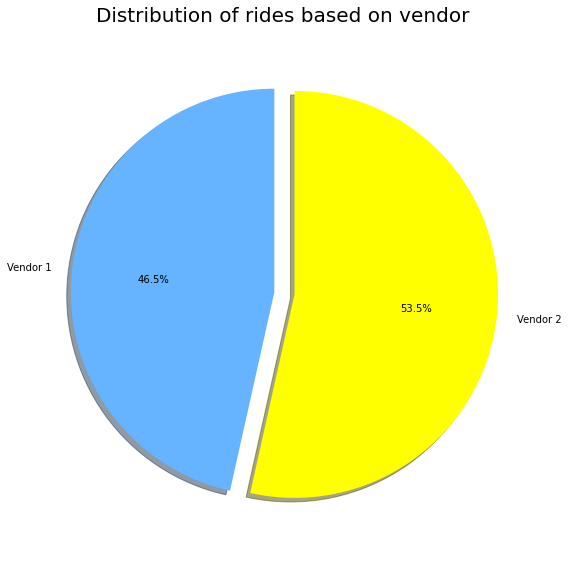

In [16]:
sizes = [vendor_distributions.counter[0],vendor_distributions.counter[1]]
labels = ['Vendor 1','Vendor 2']
explode = (0.1, 0)
colors = ['#66b3ff','yellow']

plt.figure(figsize= (8,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.title('Distribution of rides based on vendor',fontsize = 20)
plt.axis('equal')
plt.tight_layout()

In [17]:
passenger_dist = train.groupby(by='passenger_count',as_index=False).counter.count()
display(passenger_dist)

,passenger_count,counter
0,0,60
1,1,1033540
2,2,210318
3,3,59896
4,4,28404
5,5,78088
6,6,48333
7,7,3
8,8,1
9,9,1


In [18]:
fig = px.line(passenger_dist, 
             x="passenger_count", y="counter", 
             title='Number of rides based on number of passengers', 
             text='counter',
             width=800, height=700)
fig.update_traces(marker_color='#008000', opacity=0.8)

fig.update_layout(template = 'plotly_dark')
fig.show()

In [19]:
def calc_movingaverage(values ,N):    
    cumsum, moving_aves = [0], [0,0]
    for i, x in enumerate(values, 1):
        cumsum.append(cumsum[i-1] + x)
        if i>=N:
            moving_ave = (cumsum[i] - cumsum[i-N])/N
            moving_aves.append(moving_ave)
    return moving_aves

In [20]:
monthly_dist = train.groupby(by='pickup_month',as_index=False)[['counter']].count()
display(monthly_dist)
#month_map = montly_dist.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun'})
#monthly_map

monthly_dist['pickup_month'] = monthly_dist['pickup_month'].apply(lambda x: calendar.month_abbr[x])
display(monthly_dist)

,pickup_month,counter
0,1,229707
1,2,238300
2,3,256189
3,4,251645
4,5,248487
5,6,234316


,pickup_month,counter
0,Jan,229707
1,Feb,238300
2,Mar,256189
3,Apr,251645
4,May,248487
5,Jun,234316


In [21]:
fig = px.line(monthly_dist, 
             x="pickup_month", y="counter", 
             title='Distribution of number of rides based on month', 
             text='counter',
             width=800, height=700)
fig.update_traces(marker_color='#008000', opacity=0.8)

fig.update_layout(template = 'plotly_dark')
fig.show()

In [22]:
monthly_dist = train.groupby(['pickup_month','pickup_day'],as_index=False)[['counter']].count()
display(monthly_dist)
print(monthly_dist.pickup_month.unique())
monthly_dist['pickup_month'] = monthly_dist['pickup_month'].apply(lambda x: calendar.month_abbr[x])
display(monthly_dist)
print(monthly_dist.pickup_month.unique())

,pickup_month,pickup_day,counter
0,1,1,7162
1,1,2,6512
2,1,3,6353
3,1,4,6725
4,1,5,7204
...,...,...,...
177,6,26,7084
178,6,27,7311
179,6,28,7253
180,6,29,7623


[1 2 3 4 5 6]


,pickup_month,pickup_day,counter
0,Jan,1,7162
1,Jan,2,6512
2,Jan,3,6353
3,Jan,4,6725
4,Jan,5,7204
...,...,...,...
177,Jun,26,7084
178,Jun,27,7311
179,Jun,28,7253
180,Jun,29,7623


['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun']


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



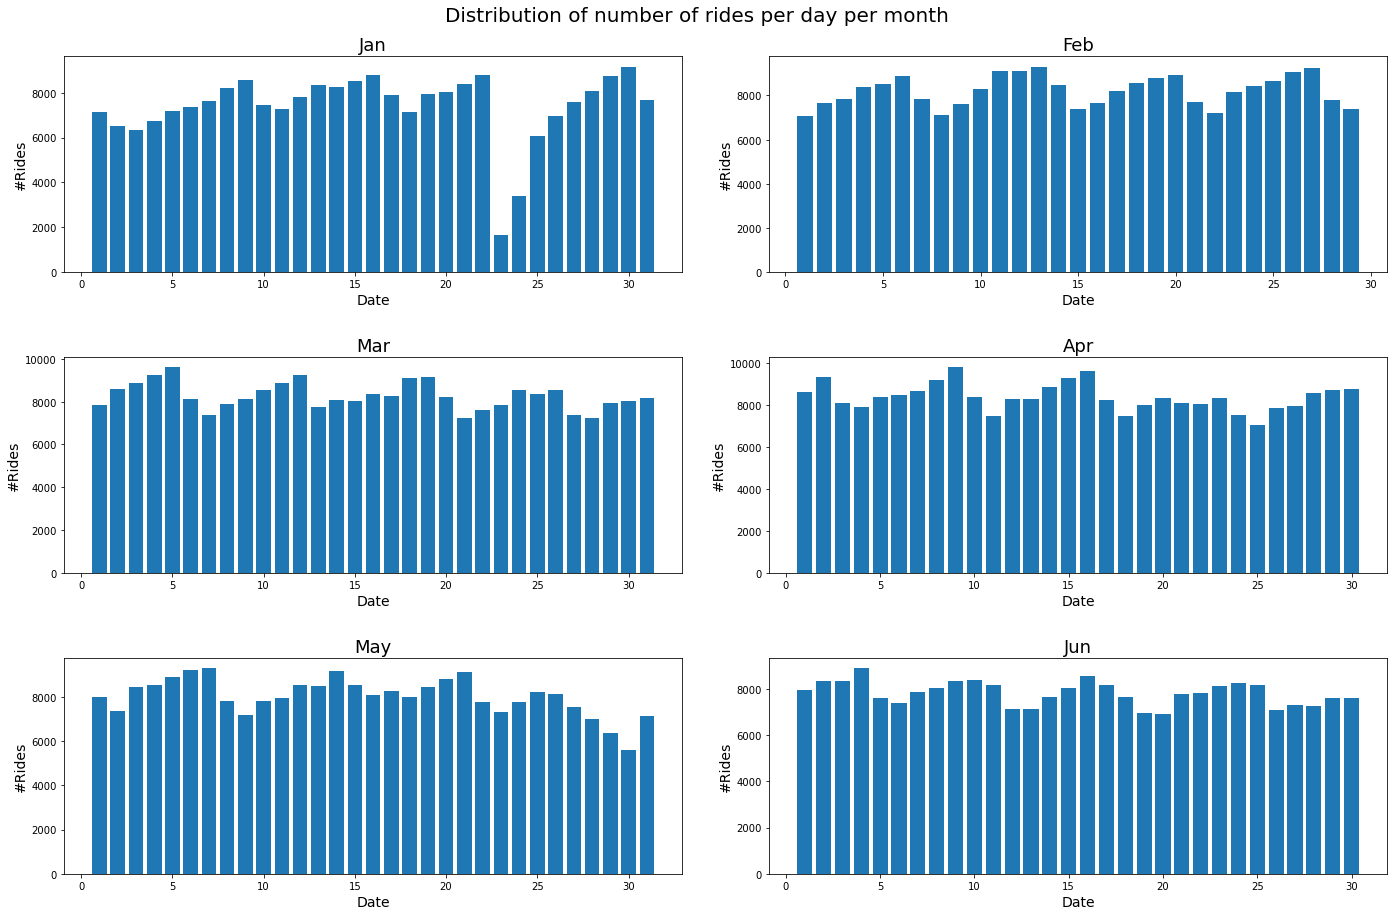

In [23]:
fig = plt.figure(figsize=(20,25))
ax = fig.add_subplot(6, 2, 3)
plt.suptitle('Distribution of number of rides per day per month',fontsize = 20,y=1.0)
k=1
for i in monthly_dist.pickup_month.unique():
    plotter = monthly_dist.loc[monthly_dist['pickup_month']== i]
    
    ax = fig.add_subplot(6,2,k)
    ax.bar(plotter['pickup_day'],plotter['counter'])
    plt.title(i,fontsize=18)
    plt.xlabel('Date',fontsize=14)
    plt.ylabel('#Rides',fontsize=14)
    k+=1
plt.tight_layout(pad=3.0)

In [24]:
#week_day = monthly_dist.loc[monthly_dist['pickup_day'].isin([1,2,3,4,5])]
monthly_dist = train.groupby(['pickup_dow'],as_index=False)[['counter']].count()
#plt.plot

In [25]:
monthly_dist = train.groupby(['pickup_month','pickup_day','pickup_dow'],as_index=False)[['counter']].count()
monthly_dist['pickup_month'] = monthly_dist['pickup_month'].apply(lambda x: calendar.month_abbr[x])
def plotter_dow(df,mth) : 
    wk_day = df.loc[df['pickup_dow'].isin([0,1,2,3,4])]
    we_day = df.loc[df['pickup_dow'].isin([5,6])]
    #tue = df.loc[df['pickup_dow'] == 1]
    #wed = df.loc[df['pickup_dow'] == 2]
    #thu = df.loc[df['pickup_dow'] == 3]
    #fri = df.loc[df['pickup_dow'] == 4]
    #sat = df.loc[df['pickup_dow'] == 5]
    #sun = df.loc[df['pickup_dow'] == 6]
    ax = fig.add_subplot(6,3,k)
    ax.bar(wk_day['pickup_day'],wk_day['counter'],color='black',label='weekday')
    ax.bar(we_day['pickup_day'],we_day['counter'],color='gold',label='weekend')
    #ax.bar(mon['pickup_day'],mon['counter'],color='blue')
    #ax.bar(tue['pickup_day'],tue['counter'],color='blue')
    #ax.bar(wed['pickup_day'],wed['counter'],color='blue')
    #ax.bar(thu['pickup_day'],thu['counter'],color='blue')
    #ax.bar(fri['pickup_day'],fri['counter'],color='blue')
    #ax.bar(sat['pickup_day'],sat['counter'],color='red')
    #ax.bar(sun['pickup_day'],sun['counter'],color='red')
    plt.title(mth,fontsize=18)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    plt.xlabel('Date',fontsize=14)
    plt.ylabel('#Rides',fontsize=14)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



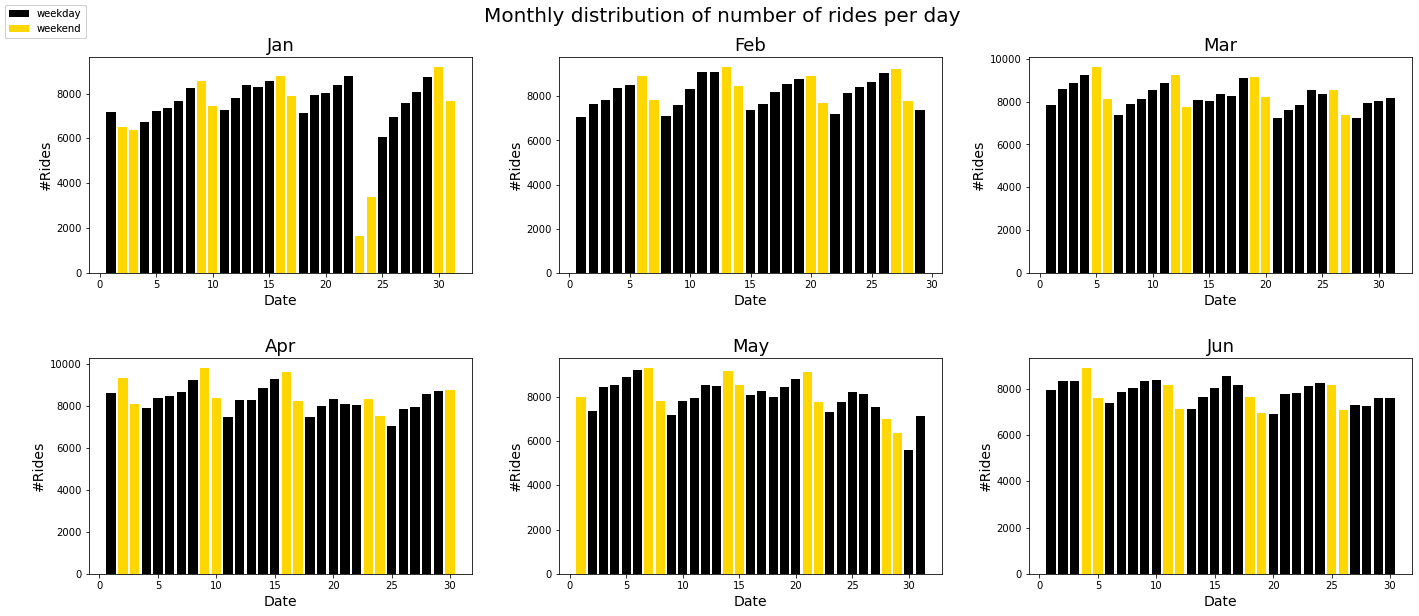

In [26]:
fig = plt.figure(figsize=(20,25))
ax = fig.add_subplot(6, 3, 2)
plt.suptitle('Monthly distribution of number of rides per day',fontsize = 20,y=1.0)
k=1
for i in monthly_dist.pickup_month.unique():
    plotter = monthly_dist.loc[monthly_dist['pickup_month']== i]
    plotter_dow(plotter,i)
    k+=1
plt.tight_layout(pad=3.0)

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3675: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



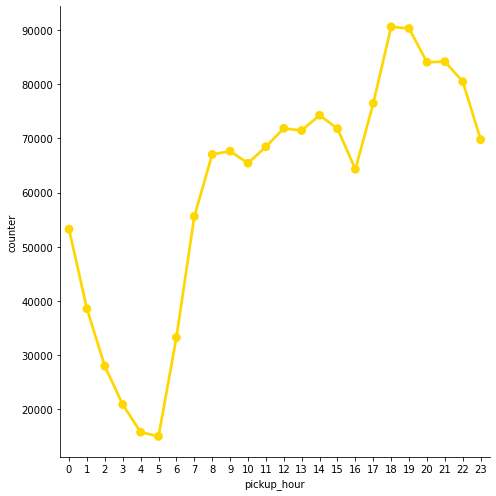

In [27]:
pickup_time = train.groupby(['pickup_hour'],as_index=False)[['counter']].count()
sns.factorplot(x="pickup_hour", y="counter", data=pickup_time,color='gold',size=7,title='Number of rides per hour')

In [28]:
pickup_time = train.groupby(['pickup_dow','pickup_hour'],as_index=False)[['counter']].count()

fig = px.treemap(pickup_time, path=['pickup_dow','pickup_hour'], values='counter',
                  color='counter', hover_data=['pickup_hour','counter'],
                  color_continuous_scale='RdBu', title='Number of rides per hour')
fig.show()

In [29]:
pickup_time = train.groupby(['pickup_dow','pickup_hour'],as_index=False)[['counter']].count()
pickup_time['pickup_dow'] = pickup_time['pickup_dow'].apply(lambda x: calendar.day_abbr[x])
fig = px.treemap(pickup_time, path=['pickup_dow','pickup_hour'], values='counter',
                  color='counter', hover_data=['pickup_hour','counter'],
                  color_continuous_scale='Blues', title='Number of rides per hour')
fig.show()

In [30]:
pickup_time = train.groupby(['pickup_dow','pickup_hour'],as_index=False)[['counter']].count()

fig = px.treemap(pickup_time, path=['pickup_dow','pickup_hour'], values='counter',
                  color='counter', hover_data=['pickup_hour','counter'],
                  color_continuous_scale='Greens', title='Number of rides per hour')
fig.show()

In [31]:
west, south, east, north = -74.03, 40.63, -73.77, 40.85

train = train[(train.pickup_latitude> south) & (train.pickup_latitude < north)]
train = train[(train.dropoff_latitude> south) & (train.dropoff_latitude < north)]
train = train[(train.pickup_longitude> west) & (train.pickup_longitude < east)]
train = train[(train.dropoff_longitude> west) & (train.dropoff_longitude < east)]

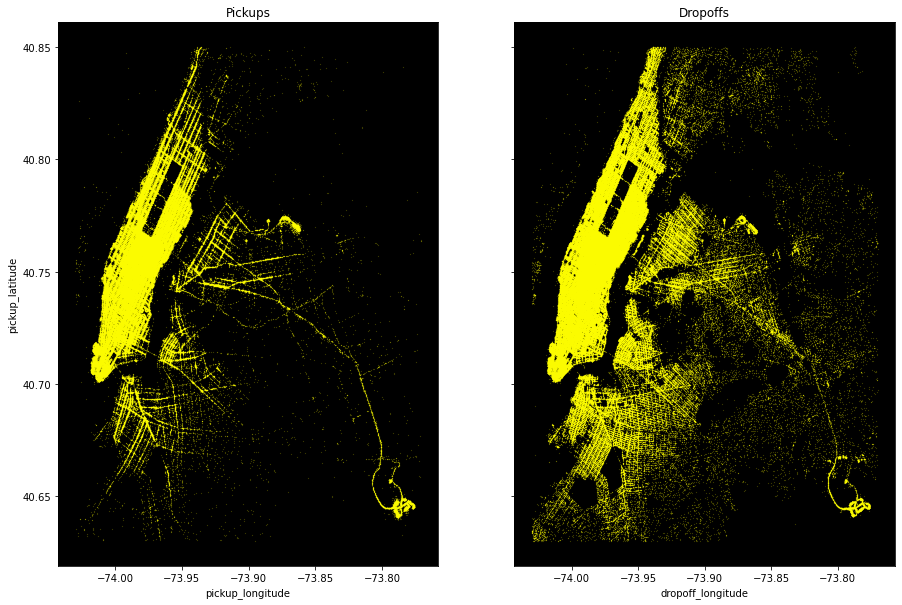

In [32]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(15,10))

train.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=True, ax=ax1)
ax1.set_title("Pickups")
ax1.set_facecolor('black')

train.plot(kind='scatter', x='dropoff_longitude', y='dropoff_latitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=True, ax=ax2)
ax2.set_title("Dropoffs")
ax2.set_facecolor('black') 

In [33]:
north_rides = train.loc[train['pickup_latitude'] < train['dropoff_latitude']]
south_rides = train.loc[train['pickup_latitude'] > train['dropoff_latitude']]
east_rides = train.loc[train['pickup_longitude'] > train['dropoff_longitude']]
west_rides = train.loc[train['pickup_longitude'] < train['dropoff_longitude']]
print("Number of rides due north : ",north_rides.shape[0])
print("Number of rides due south : ",south_rides.shape[0])
print("Number of rides due west : ",west_rides.shape[0])
print("Number of rides due east : ",east_rides.shape[0])

Number of rides due north :  725176
Number of rides due south :  707733
Number of rides due west :  755731
Number of rides due east :  676894


<BarContainer object of 4 artists>

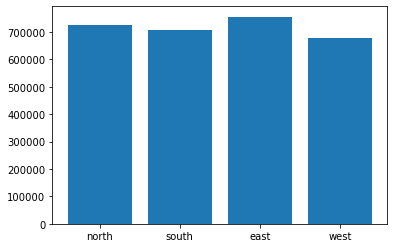

In [34]:
plt.bar(['north','south','east','west'] , [north_rides.shape[0],south_rides.shape[0],west_rides.shape[0],east_rides.shape[0]])

In [35]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,total_distance,counter,pickup_month,dropoff_month,pickup_day,dropoff_day,pickup_doy,dropoff_doy,pickup_dow,dropoff_dow,pickup_hour,dropoff_hour,pickup_minute,dropoff_minute
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2009.1,0,3,3,14,14,74,74,0,0,17,17,24,32
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2513.2,0,6,6,12,12,164,164,6,6,0,0,43,54
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11060.8,0,1,1,19,19,19,19,1,1,11,12,35,10
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1779.4,0,4,4,6,6,97,97,2,2,19,19,32,39
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1614.9,0,3,3,26,26,86,86,5,5,13,13,30,38


In [36]:
df = train.groupby(['pickup_dow'],as_index=False)[['trip_duration']].mean()
df['pickup_dow'] = df['pickup_dow'].apply(lambda x: calendar.day_abbr[x])
fig = px.line(df, 
             x="pickup_dow", y="trip_duration", 
             title='Average ride time based on the day of week', 
             text=round(df['trip_duration']),
             width=800, height=700)
fig.update_traces(marker_color='#008000', opacity=0.8)

fig.update_layout(template = 'plotly_dark')
fig.show()

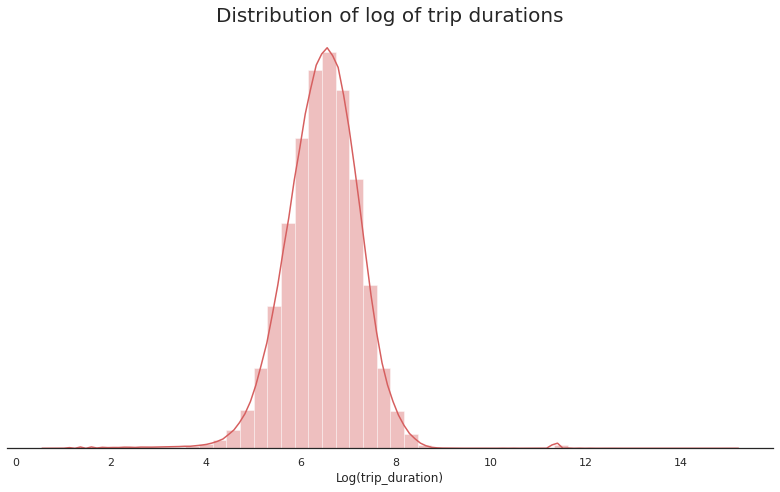

In [37]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 1, figsize=(11, 7), sharex=True)
sns.despine(left=True)
sns.distplot(np.log(train['trip_duration'].values+1), axlabel = 'Log(trip_duration)', label = 'log(trip_duration)', bins = 50, color="r")
plt.setp(axes, yticks=[])
plt.title('Distribution of log of trip durations',fontsize = 20)
plt.tight_layout()
plt.show()

In [38]:
train['speed_in_mpers'] = train['total_distance'] / train['trip_duration']
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,total_distance,counter,pickup_month,dropoff_month,pickup_day,dropoff_day,pickup_doy,dropoff_doy,pickup_dow,dropoff_dow,pickup_hour,dropoff_hour,pickup_minute,dropoff_minute,speed_in_mpers
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2009.1,0,3,3,14,14,74,74,0,0,17,17,24,32,4.415604
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2513.2,0,6,6,12,12,164,164,6,6,0,0,43,54,3.790649
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11060.8,0,1,1,19,19,19,19,1,1,11,12,35,10,5.207533
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1779.4,0,4,4,6,6,97,97,2,2,19,19,32,39,4.147786
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1614.9,0,3,3,26,26,86,86,5,5,13,13,30,38,3.712414


In [39]:
df = train.groupby(['pickup_hour'],as_index=False)[['speed_in_mpers']].mean()
#df['pickup_dow'] = df['pickup_dow'].apply(lambda x: calendar.day_abbr[x])
fig = px.line(df, 
             x="pickup_hour", y="speed_in_mpers", 
             title='Average speed based on the hour of the day', 
             #text=round(df['speed_in_mpers']),
             width=800, height=700)
fig.update_traces(marker_color='#008000', opacity=0.8)

fig.update_layout(template = 'plotly_dark')
fig.show()

In [ ]:
train = train.drop(['counter'],axis=1)
f,ax = plt.subplots(figsize = (10,10))
sns.heatmap(train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
train.columns.values

In [ ]:
y_train = train['trip_duration']
x_train = train.drop(['id','vendor_id','trip_duration','pickup_datetime','dropoff_datetime','store_and_fwd_flag'],axis=1)
#x_train = train['pickup_datetime', 'dropoff_datetime','passenger_count', 'pickup_longitude', 'pickup_latitude',
 #      'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag', 'total_distance', 'pickup_month', 'dropoff_month',
 #      'pickup_day', 'dropoff_day', 'pickup_doy', 'dropoff_doy','pickup_dow', 'dropoff_dow', 'pickup_hour', 'dropoff_hour',
  #     'pickup_minute', 'dropoff_minute', 'speed_in_mpers']

In [ ]:
x_train.dropna()